# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [45]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [25]:
# Your code here

In [26]:
# Read data
boston = pd.read_csv("../data/boston_data.csv")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [ ]:
# Meta data
"""
'''
- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per 10,000usd
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
. LSTAT % lower status of the population
'''
"""

In [14]:
# Check shape dateset
boston.shape

(404, 14)

In [16]:
# Check Nans
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [17]:
# Check outliers

for feature in boston[boston.columns]:
    Q1 = boston[feature].quantile(0.25)
    Q3 = boston[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    if boston[(boston[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

crim yes
zn yes
indus no
chas yes
nox no
rm yes
age no
dis yes
rad no
tax no
ptratio no
black no
lstat yes
medv yes


In [24]:
# remove ourliers from our dataset
Q1 = boston.quantile(q=.25)
Q3 = boston.quantile(q=.75)
IQR = boston.apply(stats.iqr)

boston = boston[~((boston < (Q1-1.5*IQR)) | (boston > (Q3+1.5*IQR))).any(axis=1)]

boston.shape

(228, 14)

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

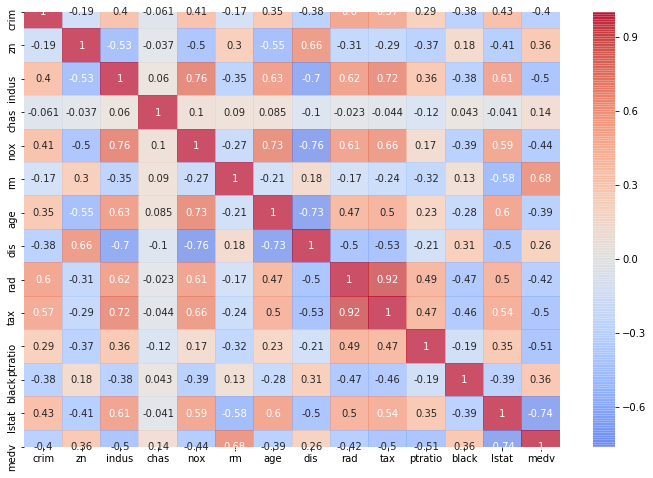

In [31]:
# Your plots here

# Check correlation 
plt.figure(figsize = (12,8))
sns.heatmap(boston.corr(), annot=True, cmap='coolwarm', alpha = 0.7, center=0);

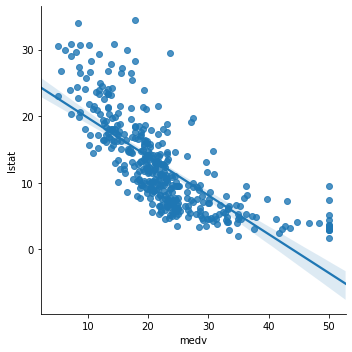

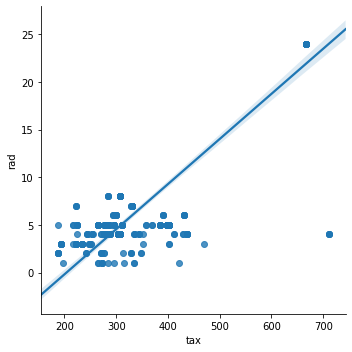

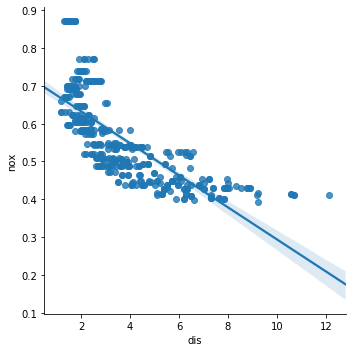

In [37]:
# pairplots of few high correlated columns:  "lstat" <> "medv", "tax"<>"rad", "dis"<>"nox"

sns.lmplot(x="medv", y='lstat', data=boston);
sns.lmplot(x="tax", y='rad', data=boston);
sns.lmplot(x="dis", y='nox', data=boston);

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here
"""
Surprise: "tax"<>"rad" that seems to have a high correlation but then we see 
that is because out sokme ouliers that before we didn't detected.
"""

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

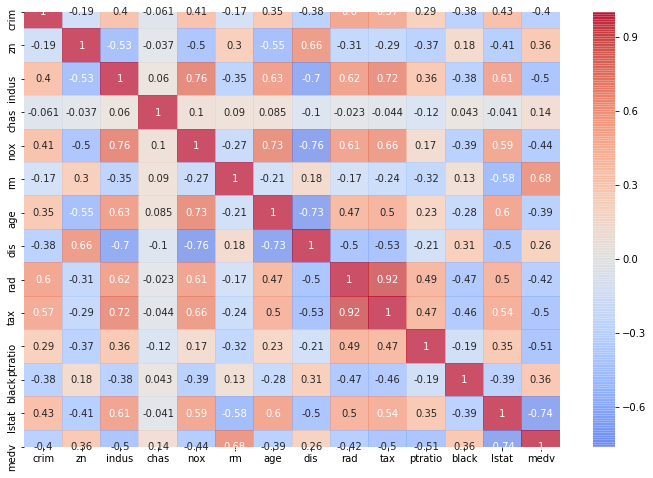

In [38]:
# Your response here
plt.figure(figsize = (12,8))
sns.heatmap(boston.corr(), annot=True, cmap='coolwarm', alpha = 0.7, center=0);

In [ ]:
# no entiendo porque otro corr si es lo mismo que antes?

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [39]:
# Your code here
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [42]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [43]:
# Your code here

X = boston.drop(['medv'], axis=1)
y = boston.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.2, shuffle=True)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [53]:
# Five separate RFR here with the given max depths
depths = [2, 4, 6, 8, 10 ]

rfcs = [RandomForestRegressor(n_estimators = 100, max_depth = i, random_state=123) for i in depths]

rfc_fit = [rfc.fit(X_train, y_train) for rfc in rfcs]

score_train = [performance_metric(y_train, rfc.predict(X_train)) for rfc in rfc_fit]
score_test = [performance_metric(y_test, rfc.predict(X_test)) for rfc in rfc_fit]

Now, plot the score for each tree on the training set and on the testing set.

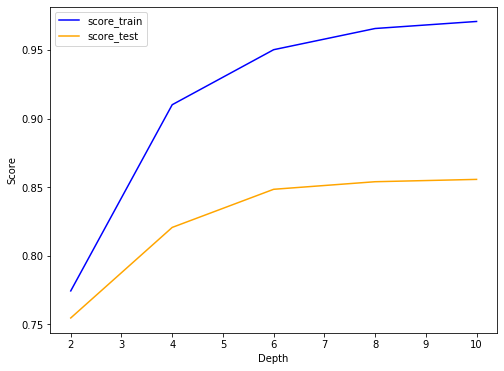

In [58]:
plt.figure(figsize = (8,6))
label=['score_train', 'score_test']

sns.lineplot(x=depths, y=score_train, color = 'blue')   
sns.lineplot(x=depths , y=score_test, color = 'orange')  

plt.legend(label)
plt.xlabel('Depth')
plt.ylabel('Score') 
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here
"""
we have over-fitting as out train data resuls are higher then out test data
"""

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
# Your response here

In [65]:
# depth=1

params = {'max_depth': [1]}

GridSearch = GridSearchCV(estimator = RandomForestRegressor(), 
                   param_grid = params, 
                   cv = 3, 
                   n_jobs = -1, 
                   verbose = 2)

GridSearch.fit(X_train, y_train)
print(pd.DataFrame(GridSearch.cv_results_))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.170329      0.023318         0.009666        0.002014   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.187484           0.496569   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.508636         0.397563         0.14863                1  


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.3s finished


In [66]:
"""
The model suffer from high bias ( we miss important relations between variables()
We have underfitting
"""

'\nThe model suffer from high bias ( we miss important relations between variables()\nWe have underfitting\n'

In [67]:
# depth=10

params = {'max_depth': [10]}

GridSearch = GridSearchCV(estimator = RandomForestRegressor(), 
                   param_grid = params, 
                   cv = 3, 
                   n_jobs = -1, 
                   verbose = 2)

GridSearch.fit(X_train, y_train)
print(pd.DataFrame(GridSearch.cv_results_))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.4s finished


   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.385101      0.108314         0.015663        0.002966   

  param_max_depth             params  split0_test_score  split1_test_score  \
0              10  {'max_depth': 10}            0.58998           0.869784   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.758941         0.739569        0.115048                1  


In [68]:
"""
The model suffer from high variance.
We have overfitting
"""

'\nThe model suffer from high variance.\nWe have overfitting\n'

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [70]:
# Your response here

params = {'max_depth': np.arange(1,20)}
model = RandomForestRegressor(n_estimators = 100, random_state=0)

In [72]:
model_sel = GridSearchCV(model, params)
model_sel.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [73]:
model_sel.best_params_

{'max_depth': 11}

In [ ]:
"""
I am confused as the best aparamt for depth is 11 (?) - will need to recheck
But the model would prefer: High Variance/ Low Bias?
"""

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here